In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/06


In [2]:
def ABS(hist):
    Nx = hist.GetNbinsX()
    for n in range(Nx):
        v = hist.GetBinContent(n+1)
        hist.SetBinContent(n+1,abs(v))
    return hist

def DrawPU_Cmp(n,title):
    ET_raw = fs[n].Get('wiggle1700/ET_adhoc').Clone()
    ET_pu  = fs[n].Get('wiggle1700/ET_adhoc_pu').Clone()

    ET_corr = ET_raw.Clone()
    ET_corr.Add(ET_pu,-1)

    t_start = ET_raw.GetXaxis().FindBin(30)
    t_end = ET_raw.GetXaxis().FindBin(650)

    hists_ET = [ET_raw,ET_pu,ET_corr]
    hists_E = []
    for n in range(3):
        h = hists_ET[n].ProjectionY('hist_E_%s'%(n),t_start,t_end)
        hists_E.append(ABS(h))


    names = ['Raw','PU','Corrected']
    colors = [R.kBlack,R.kRed,R.kBlue]
    c = R.TCanvas()
    c.SetLogy(1)
    leg = R.TLegend(0.6,0.6,0.9,0.9)
    for n in range(3):
        hists_E[n].SetStats(0)
        hists_E[n].SetLineColor(colors[n])
        hists_E[n].SetLineWidth(2)
        hists_E[n].GetXaxis().SetRangeUser(1700,7000)
        leg.AddEntry(hists_E[n],names[n],'l')
        hists_E[n].Draw('histsame')
        hists_E[n].SetTitle('%s;Energy [MeV];N'%(title))

    leg.Draw()
    c.Draw()
    return [c,leg,hists_E]

In [3]:
fs = []
fs.append(R.TFile('../data/Run2C_FIXPU_0.root'))
fs.append(R.TFile('../data/Run2C_FIXPU/GainSyst_FIXPU_adhoc1_Run2C.root'))

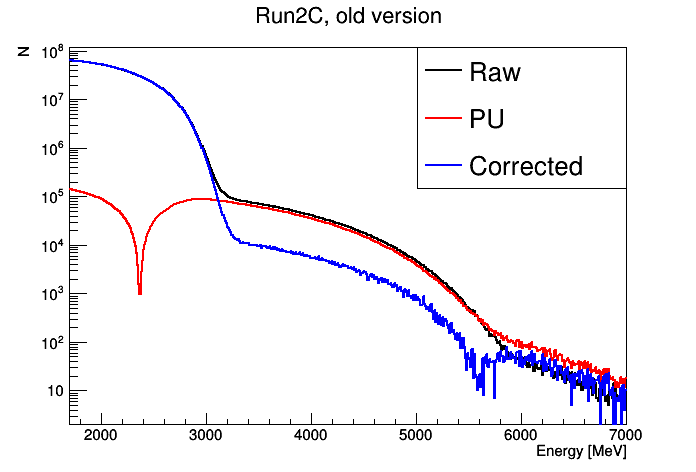

In [4]:
n = 0
title = 'Run2C, old version'
cs = DrawPU_Cmp(n,title)

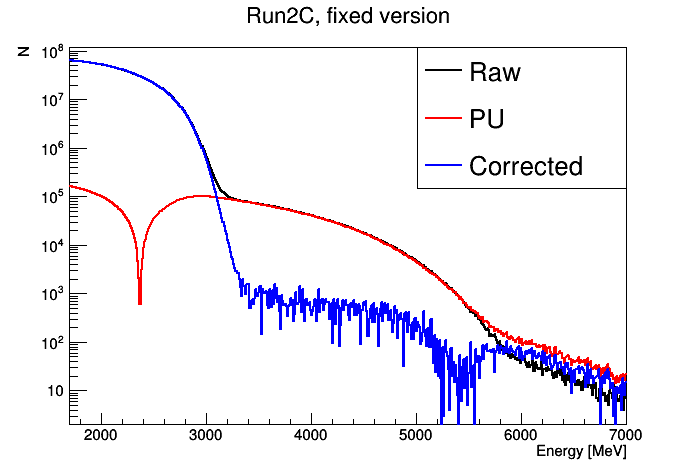

In [5]:
n = 1
title = 'Run2C, fixed version'
cs = DrawPU_Cmp(n,title)

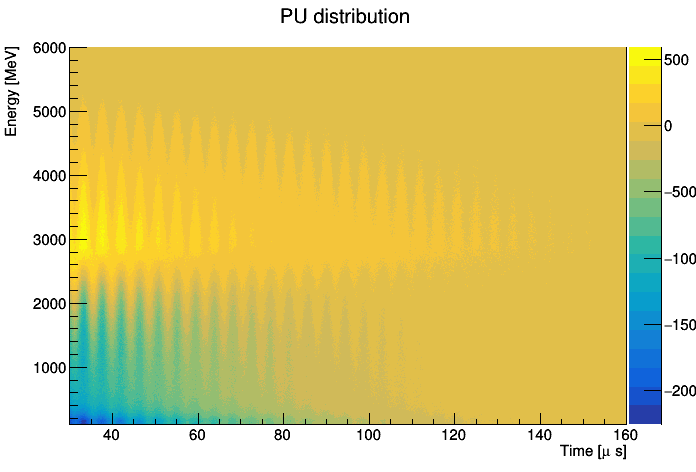

In [6]:
h_pu = fs[1].Get('wiggle1700/ET_adhoc_pu').Clone()

c = R.TCanvas()
h_pu.SetStats(0)
h_pu.SetTitle('PU distribution;Time [#mu s];Energy [MeV]')
h_pu.Draw('COLZ')
h_pu.GetXaxis().SetRangeUser(30,160)
h_pu.GetYaxis().SetRangeUser(100,6000)
c.Draw()


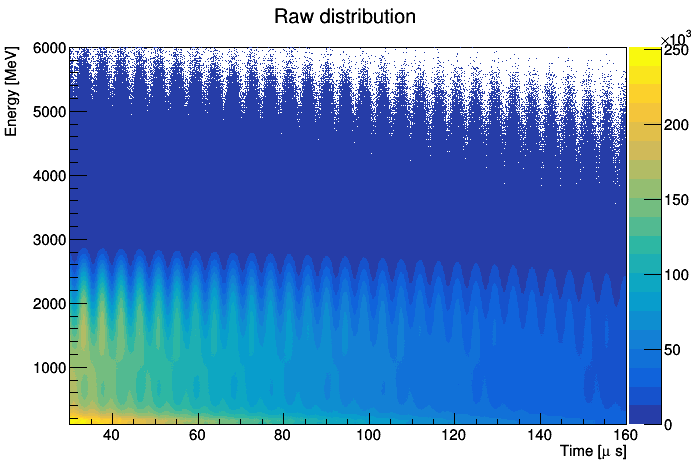

In [7]:
h_pu = fs[1].Get('wiggle1700/ET_adhoc').Clone()

c = R.TCanvas()
h_pu.SetStats(0)
h_pu.SetTitle('Raw distribution;Time [#mu s];Energy [MeV]')
h_pu.Draw('COLZ')
h_pu.GetXaxis().SetRangeUser(30,160)
h_pu.GetYaxis().SetRangeUser(100,6000)
c.Draw()


117895949395.62164
117895949395.62164


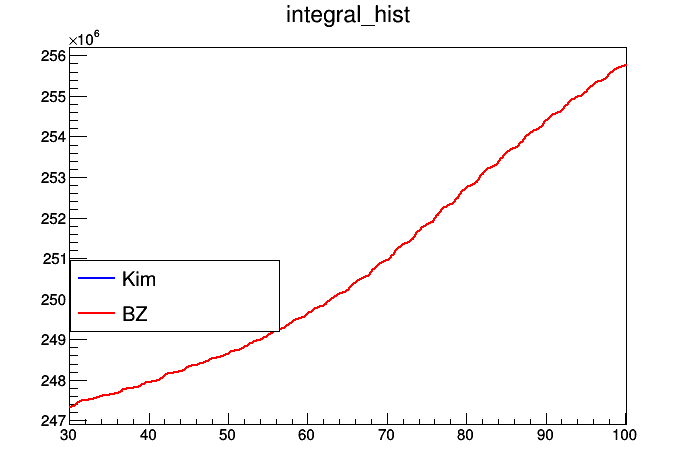

In [8]:
period = ['all','B','C','D','E','F','G','H']

lm_ksh = R.TFile('/Users/cheng/Downloads/run2all_LM.root')
lm_bz = R.TFile('~/WorkRun23/data/Run2_3_LM_spectrum_and_integral.root')

names = ['Kim','BZ']
colors = [R.kBlue,R.kRed]


h_ksh = lm_ksh.Get('run2all_LM_spec_integral')
h_bz = lm_bz.Get('run2all_LM_integral')
hs = [h_ksh,h_bz]
c = R.TCanvas()
leg = R.TLegend()
for n in [0,1]:
    hs[n].SetLineColor(colors[n])
    hs[n].SetLineWidth(2)
    hs[n].SetStats(0)
    leg.AddEntry(hs[n],names[n],'l')
    hs[n].Draw('histsame')
    hs[n].GetXaxis().SetRangeUser(30,100)
    print (hs[n].Integral())
c.Draw()
leg.Draw()




Name: all Title: integral_hist NbinsX: 4500 run2all_LM_spec_integral
Name: B Title: integral_hist NbinsX: 4500 run2B_LM_spec_intergral
Name: C Title:  NbinsX: 4500 run2C_LM_spec_intergral
Name: D Title: integral_hist NbinsX: 4500 run2D_LM_spec_intergral
Name: E Title: integral_hist NbinsX: 4500 run2E_LM_spec_intergral
Name: F Title: integral_hist NbinsX: 4500 run2F_LM_spec_intergral
Name: G Title: integral_hist NbinsX: 4500 run2G_LM_spec_intergral
Name: H Title: integral_hist NbinsX: 4500 run2H_LM_spec_intergral


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


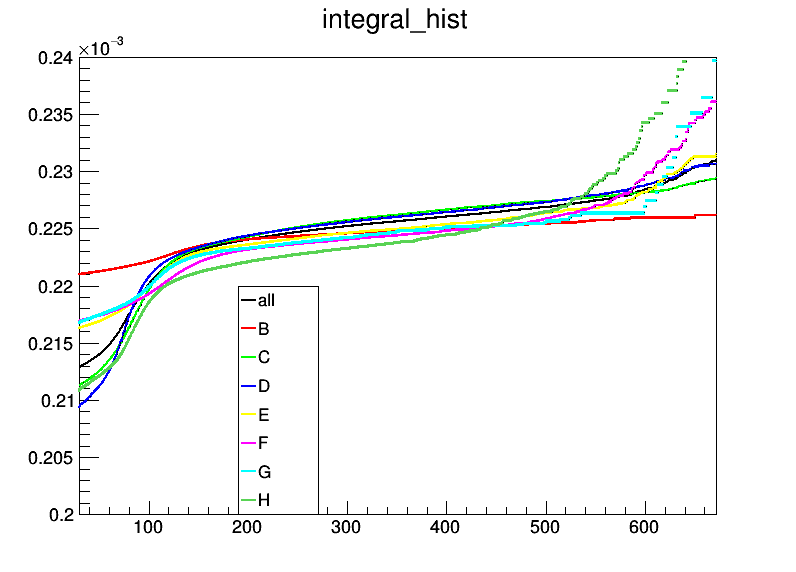

In [24]:
period = ['all','B','C','D','E','F','G','H']
# period = ['B','C','D']#,'E','F','G','H']
c1 = R.TCanvas('c1','c1',800,600)
c1.cd(0)
c1.SetLogy(0)

hs = []
n=1
leg = R.TLegend(0.3,0.1,0.4,0.5)
for p in period:
    if p == 'all':
        hname = 'run2%s_LM_spec_integral'%(p)
    else:
        hname = 'run2%s_LM_spec_intergral'%(p)
    h = lm_ksh.Get(hname).Clone()
    h.SetName(p)
    h_int = h.Integral()
    h.Scale(1./h_int)
    print (h,hname)
    hs.append(h)
    h.SetLineColor(n)
    h.SetLineWidth(2)
    h.SetStats(0)
    h.GetXaxis().SetRangeUser(30,900)
    leg.AddEntry(h,p,'l')
    h.Draw('lsame')
    h.GetYaxis().SetRangeUser(0.2e-3,0.24e-3)
    n+=1
leg.Draw()
c1.Draw()

In [3]:
fnew = R.TFile('../data/Run2_LM.root','recreate')
lm_ksh = R.TFile('/Users/cheng/Downloads/run2all_LM.root')

period = ['all','B','C','D','E','F','G','H']

for p in period:
    if p == 'all':
        hname = 'run2%s_LM_spec_integral'%(p)
    else:
        hname = 'run2%s_LM_spec_intergral'%(p)
    hold = lm_ksh.Get(hname)
    hnew = hold.Clone()
    if p == 'all':
        p = 'All'
    hnew.SetName('Run2%s_LM_integral'%(p))
    hnew.SetDirectory(fnew)
    fnew.cd()
    hnew.Write()

fnew.Close()